In [1]:
import pandas as pd
import pvtools.pv_curve as pvc
import matplotlib.pyplot as plt

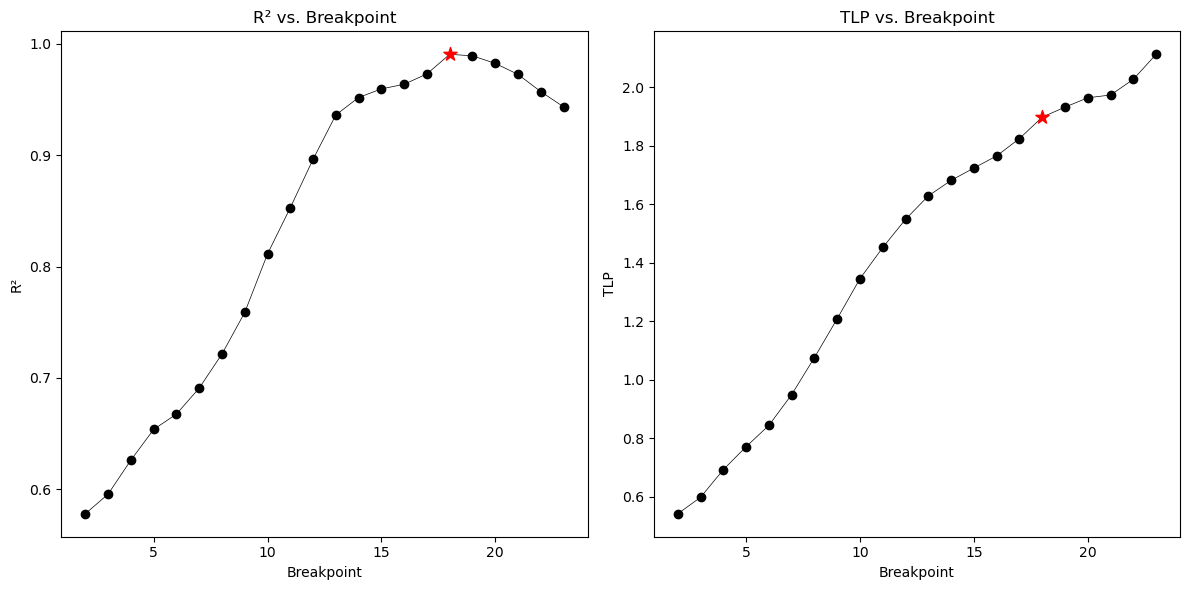

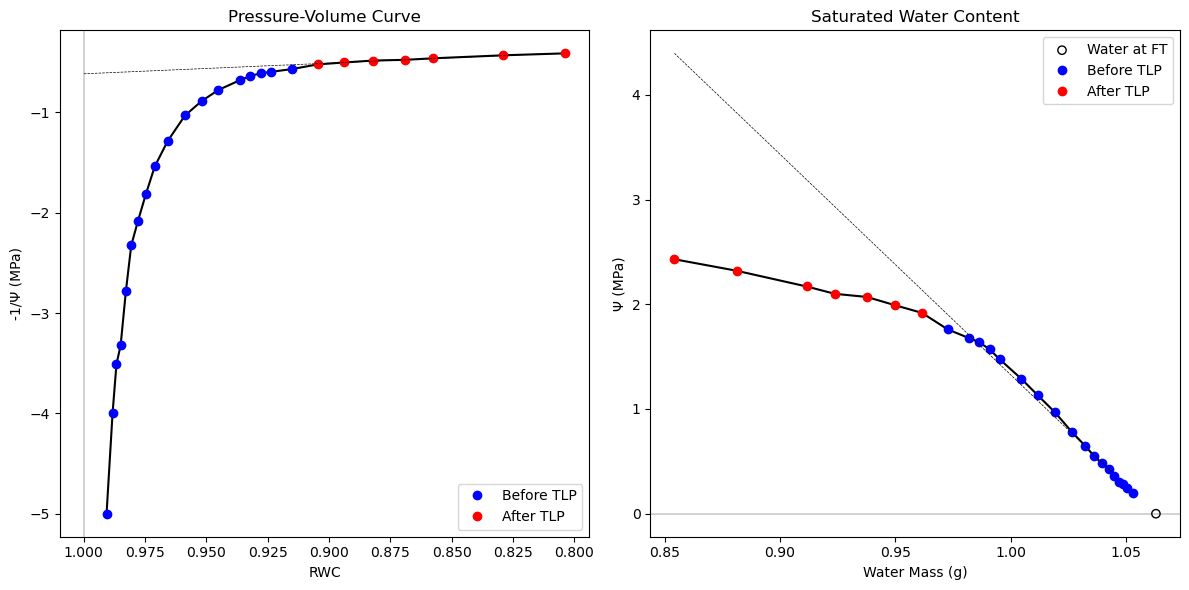

In [2]:
# this is data I collected for a eucalyptus globulus on UCSB's campus
data = pd.read_excel('eugl_1.xlsx')
psis = data['Y (Mpa)'].dropna().values
masses = data['Mass (g)'].dropna().values
dry_mass = data['Dry Weight (g)'][0]

pvc.get_breakpoint(psis, masses, dry_mass, plot=True)

pv_curve = pvc.PVCurve(psis, masses, dry_mass)
pv_curve.plot()